## Intuitive Understanding 

Based on the set of data we want to find the line that best fits the points. The goal is the minimize the distance from line to points. The ordinary least square method is trying to minimize the squared error from the points. 

In a simple linear regresssion, y = mx + b where x is the feature, y is what we want predict, m is the slope, and b is the intercept, the model allows us to build a relationship between multiple features to estimate the target value. 

The generalized "equation" for linear regression:

y_hat = sum(Beta_n * X_n)

for multiple features we need gradient descent to solve for multiple features, but for beta_1 value is derived from pearson_correlation * (std_x / std_y)

limitation of linear algebr:

anscombe's quartest illutrates, where the underlying data develops the same regression line but based on the underlying data a linear regression line doesn't make sense. 

It's important to analyze the distribution of the residuals to determine whether linear regression makes sense 

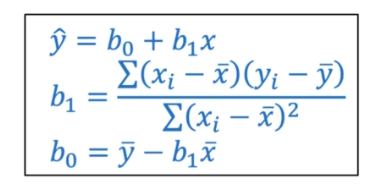

the easisest way to do this is calculating each step in it's own column, until you derive the necessary elements for simple linear regression 


### cost function and more than 1 feature 

recall we're trying to find the "best-fit" line that minimizes the squared error.  

the average squared error which is a cost function

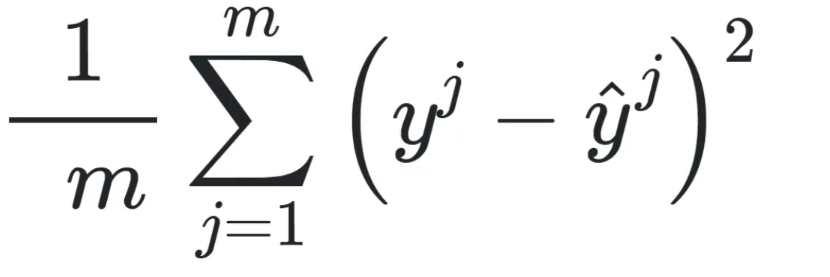

the lowercase j is the specific data row 

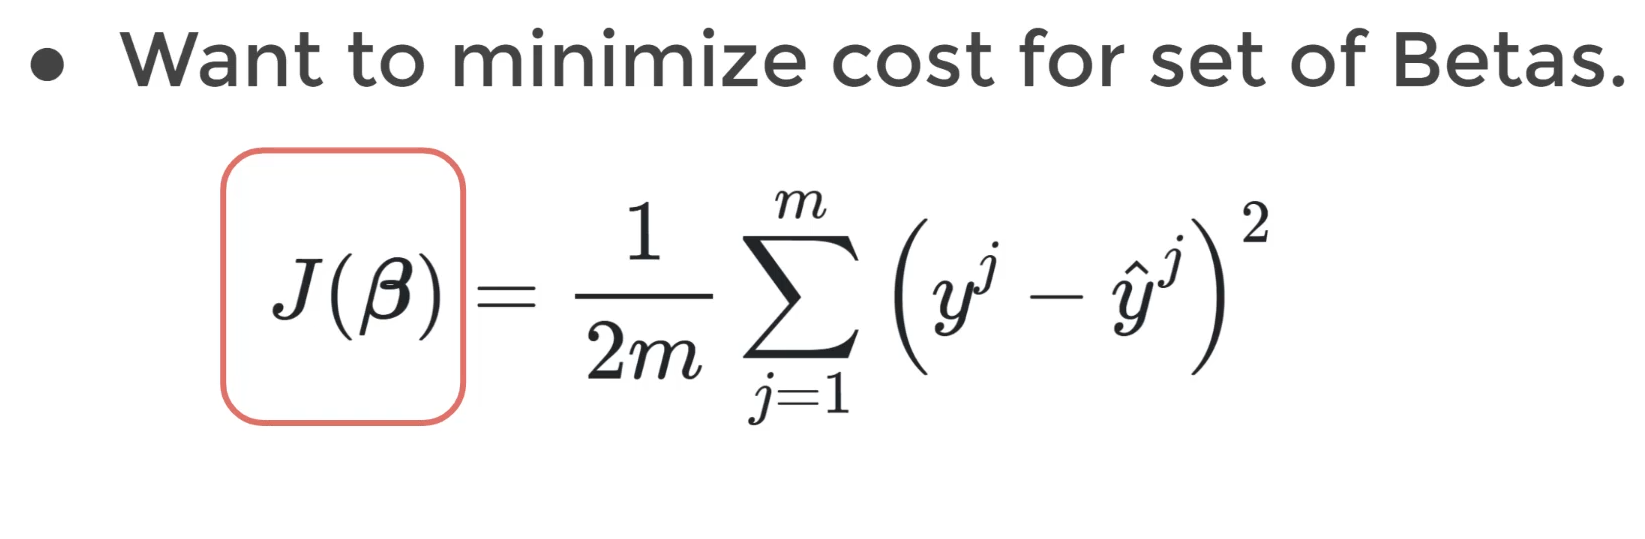

the 1/2 is for convenience for derivative 


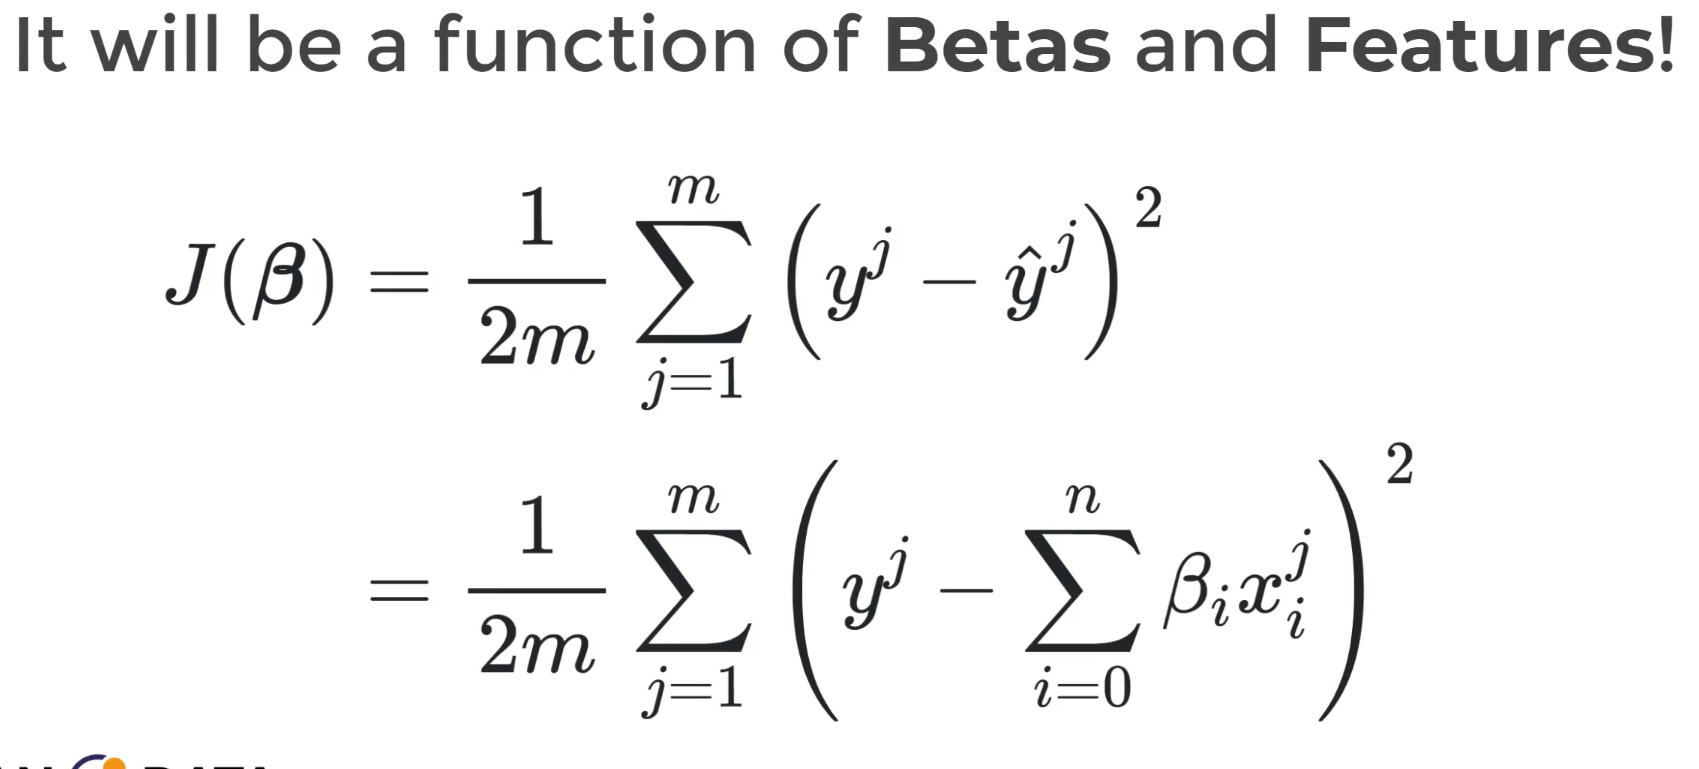

we're going to minimize cost function to minize to estimate coefficients for multiple features. 

gradient descent is the computational way to minimize the cost function

### Gradient Descent 

describe the cost function through vectorized matrix notation and use gradient descent to have a acomputer to figure out the set of beta coefficent values that minimize the cost/loss function 

find a set of beta coefficient values that minimzie the error (cost function).
leverage computational power instead of having to manually attempt analytically solve the derivative since it isn't feasible to solve for multiple features 

gradient is a multidimensional derivative 
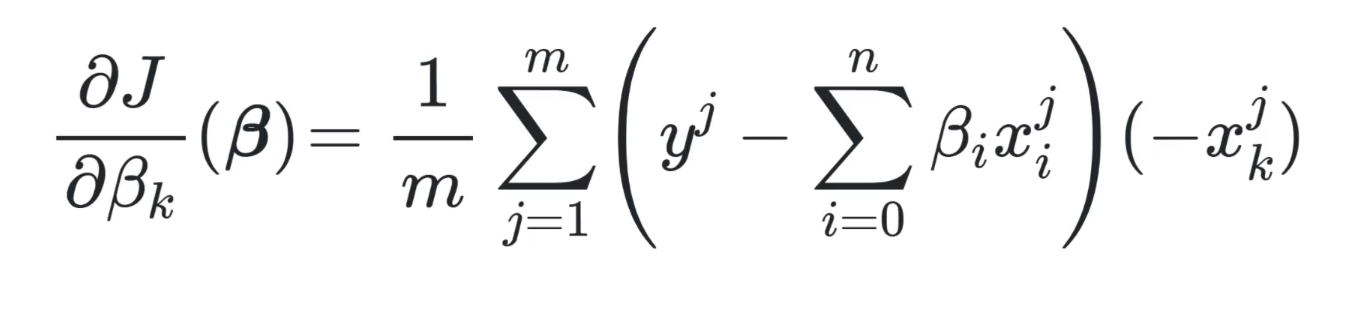
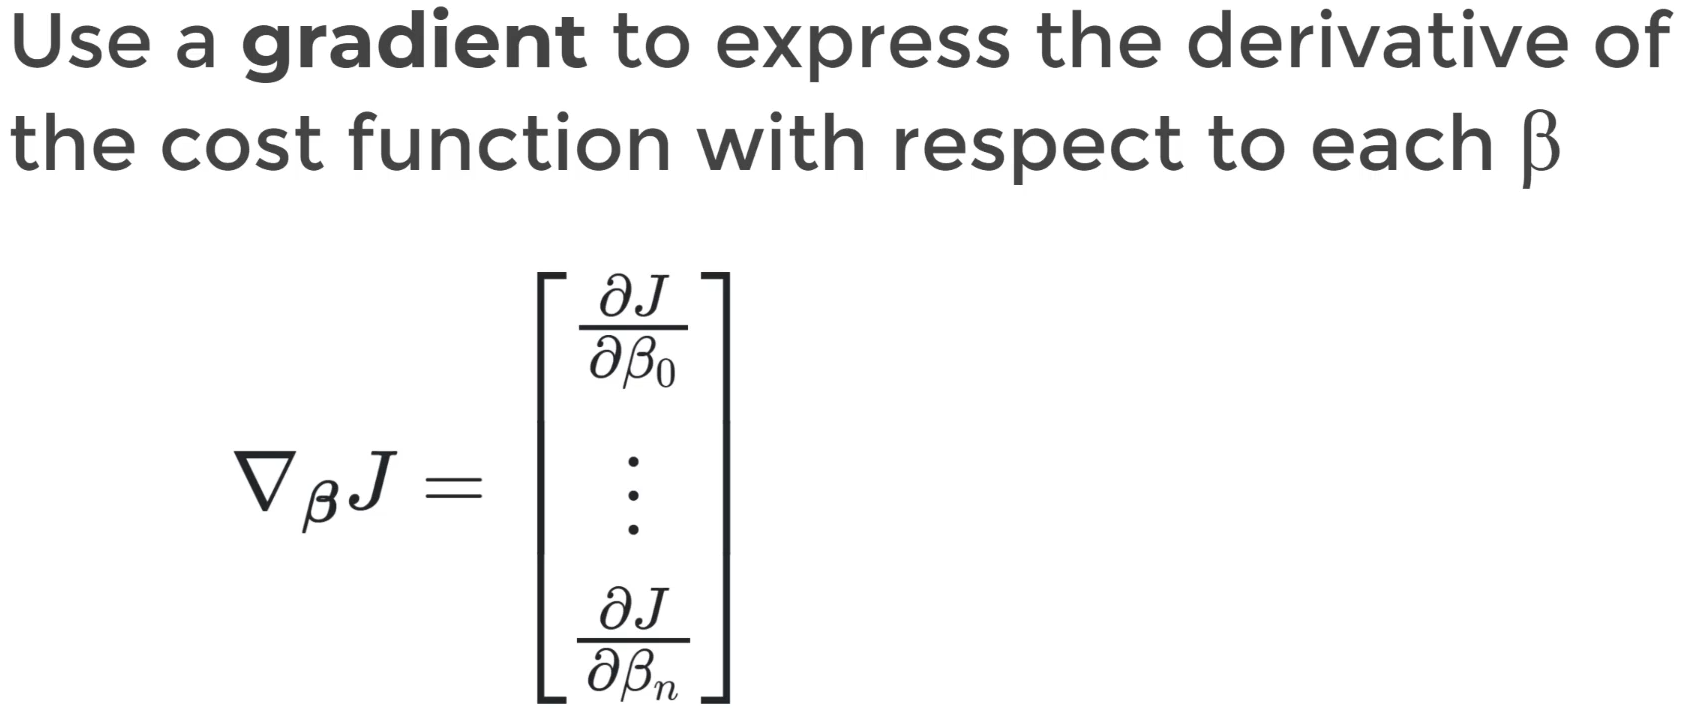
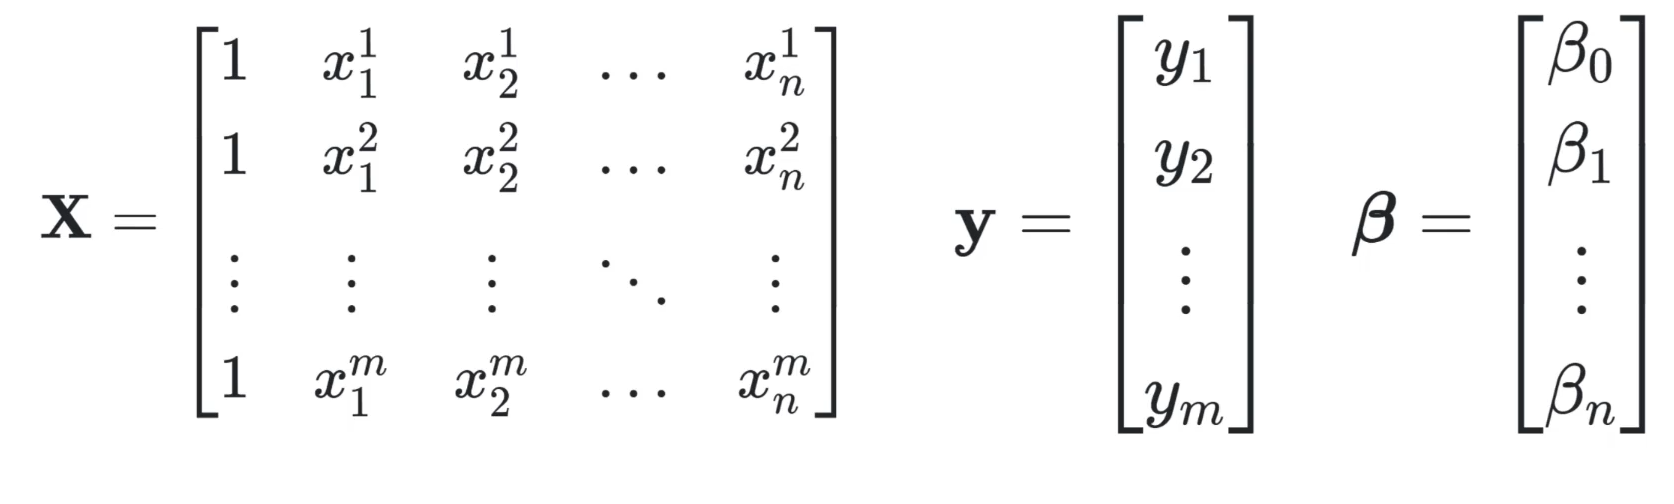
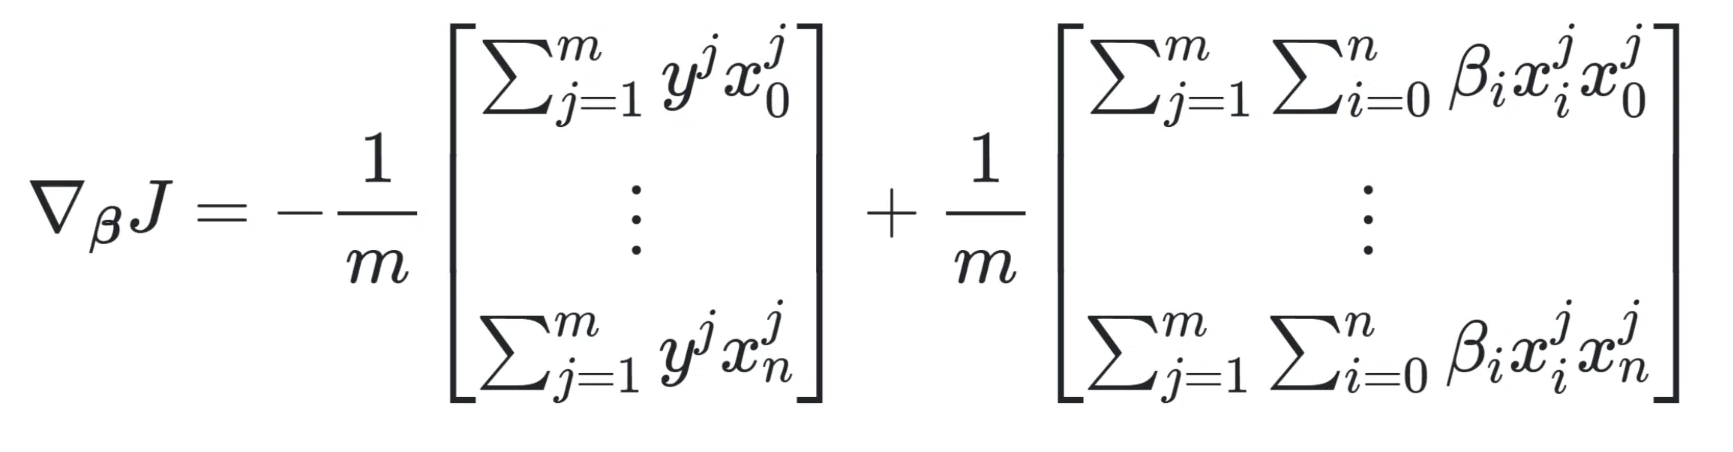  
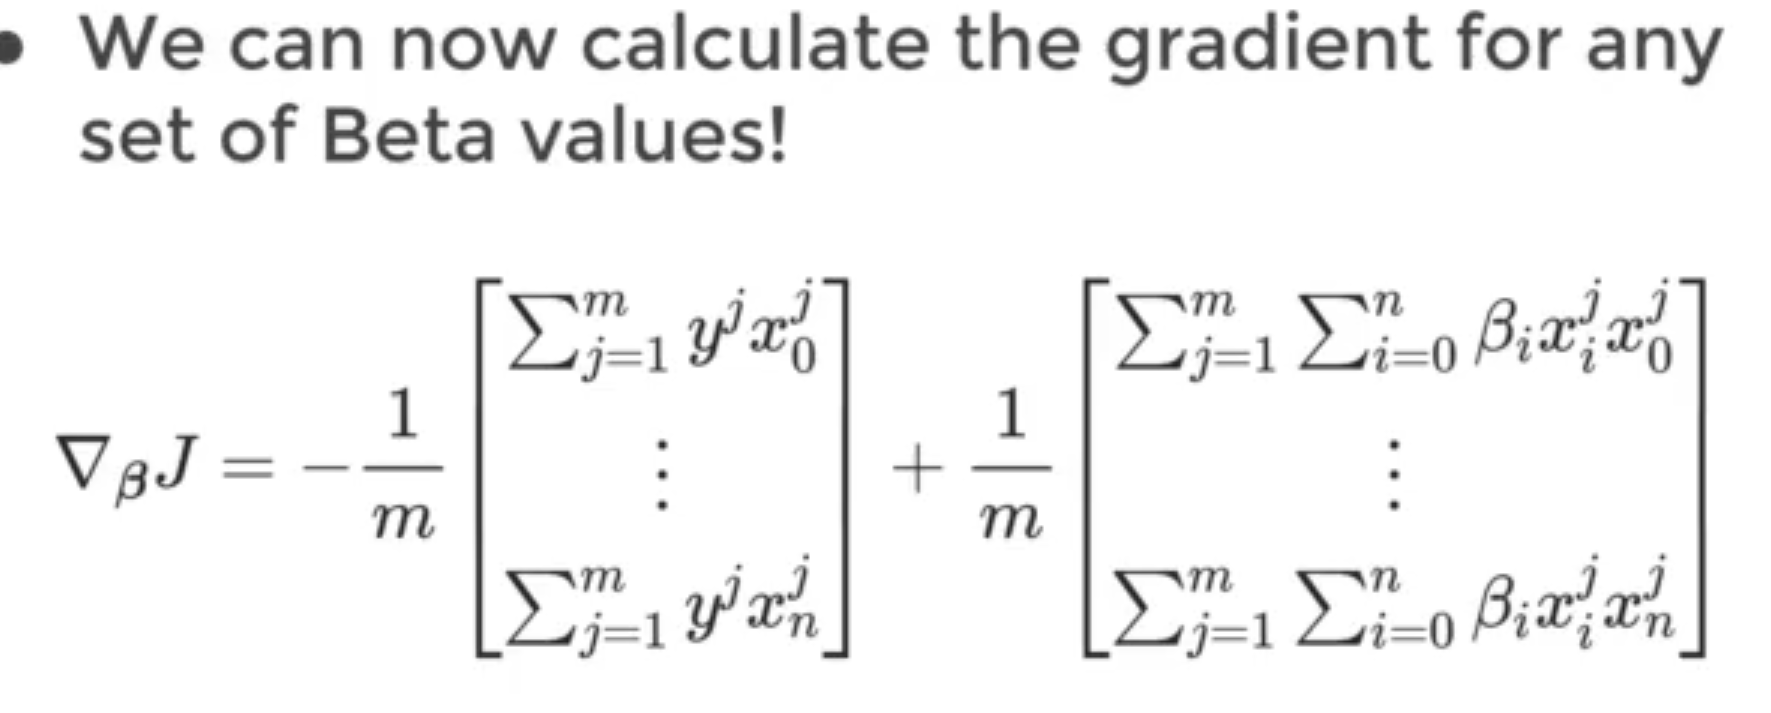

beta coefficient is the only unknown values 

we're going to use gradient descent to computationally search for minimal beta values 



given a cost function J(B) how can we computationally search for the correct value of B that minimizes the gradient of the cost function?

what would the search procss look like for single B value?

based off of starting point determine the slope of where we're at. As we calculate the slope we will move in the direction that is negative which is propotional to the negative gradient. Keep moving in that direction until the gradient or derivative is 0. 

step foward proportional to negative gradient which is analogous to larger steps. take steps until the gradient or derivative is zero which means we found the beta values that minimizes the cost function. 

smaller gradient at tend gives smaller step. 
typically beyond 1 feature we can graph 2D visualizations. 



## Code for Odinary Least Square for Simple linear regression 

In [3]:
# read through chapter 3 for ISL 

#simple linear regression 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('../data/Advertising.csv')

In [5]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
# creating a new feature
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [7]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

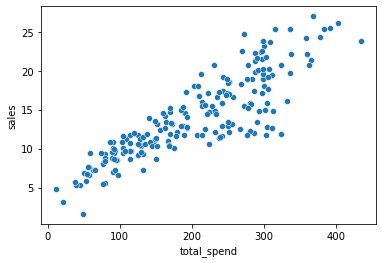

In [8]:
# the more we spend on advertising the more sales. 
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

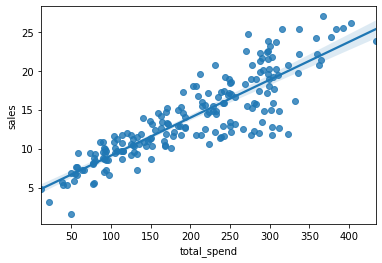

In [9]:
#calculates best fit line with ordinary least squares

sns.regplot(data = df, x = 'total_spend', y = 'sales')



In [10]:
X = df['total_spend'] # capital X for feature matrix,lowercase if 1
y = df['sales'] # target output

In [11]:

# y = mx + b
# y = B1x + B0
# help(np.polyfit)

In [12]:
# position 0 is B1 and positin 1 is B0
np.polyfit(X, y, deg = 1)

array([0.04868788, 4.24302822])

In [13]:
# theoreticl potential spend in advertising 
potential_spend = np.linspace(0, 500, 100)

In [14]:
predicted_sales= 0.04868788* potential_spend + 4.24302822

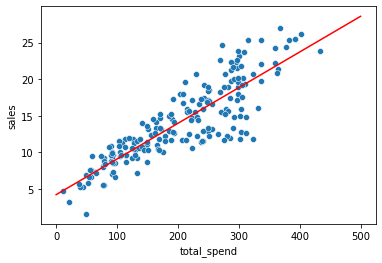

In [15]:
sns.scatterplot(x = 'total_spend', y = 'sales', data = df) 
plt.plot(potential_spend, predicted_sales, color = 'red')

created the same plot as np.polyfit, but now we have to equation associated with it 

In [16]:
spend = 200 
predicted_sales = predicted_sales= 0.04868788* spend + 4.24302822

In [17]:
predicted_sales

13.98060422

In [19]:
# for higher degrees 

np.polyfit(X, y, 3)

# y = B3*x**3 + B2*x**2 + B1x + B0
# if there is less information, no real relationship, for high order betas 
# the beta coefficient are going to get small. 



array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])